In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("../src")  # add src folder to path

from policy import StochasticPolicyNetwork
from train import train_policy

# Initialize policy
policy = StochasticPolicyNetwork(state_dim=2, action_dim=2)
# smoothed = pd.Series(rewards).rolling(window=10, min_periods=1).mean()
# plt.plot(smoothed, label='Smoothed Reward')


In [2]:
from train import train_dpo_policy

# Train DPO policy
policy_dpo = StochasticPolicyNetwork(state_dim=2, action_dim=2)
dpo_returns, dpo_dists, dpo_violations = train_dpo_policy(policy_dpo)


[DPO] Epoch 0 | Return: -89.82 | Violations: 11
[DPO] Epoch 1 | Return: -119.01 | Violations: 17
[DPO] Epoch 2 | Return: -168.98 | Violations: 30
[DPO] Epoch 3 | Return: -177.66 | Violations: 25
[DPO] Epoch 4 | Return: -135.98 | Violations: 24
[DPO] Epoch 5 | Return: -125.81 | Violations: 20
[DPO] Epoch 6 | Return: -92.77 | Violations: 12
[DPO] Epoch 7 | Return: -63.95 | Violations: 6
[DPO] Epoch 8 | Return: -109.98 | Violations: 19
[DPO] Epoch 9 | Return: -196.42 | Violations: 32
[DPO] Epoch 10 | Return: -193.23 | Violations: 33
[DPO] Epoch 11 | Return: -186.30 | Violations: 28
[DPO] Epoch 12 | Return: -189.28 | Violations: 31
[DPO] Epoch 13 | Return: -201.65 | Violations: 29
[DPO] Epoch 14 | Return: -262.62 | Violations: 34
[DPO] Epoch 15 | Return: -237.98 | Violations: 35
[DPO] Epoch 16 | Return: -254.26 | Violations: 36
[DPO] Epoch 17 | Return: -230.10 | Violations: 36
[DPO] Epoch 18 | Return: -303.09 | Violations: 44
[DPO] Epoch 19 | Return: -164.71 | Violations: 23
[DPO] Epoch 20

Episode 0: Total Reward -330.65, Final Dist 1.27, Violations: 50
Episode 10: Total Reward -122.54, Final Dist 0.88, Violations: 15
Episode 20: Total Reward -173.29, Final Dist 0.19, Violations: 31
Episode 30: Total Reward -101.62, Final Dist 0.30, Violations: 16
Episode 40: Total Reward -188.16, Final Dist 0.83, Violations: 30
Episode 50: Total Reward -149.83, Final Dist 0.69, Violations: 25
Episode 60: Total Reward -141.54, Final Dist 1.14, Violations: 18
Episode 70: Total Reward -294.37, Final Dist 0.95, Violations: 44
Episode 80: Total Reward -259.54, Final Dist 1.10, Violations: 40
Episode 90: Total Reward -248.77, Final Dist 1.10, Violations: 38
Episode 100: Total Reward -242.55, Final Dist 1.40, Violations: 35
Episode 110: Total Reward -143.17, Final Dist 0.53, Violations: 26
Episode 120: Total Reward -313.36, Final Dist 1.22, Violations: 47
Episode 130: Total Reward -304.47, Final Dist 1.25, Violations: 47
Episode 140: Total Reward -209.92, Final Dist 1.07, Violations: 35
Episod

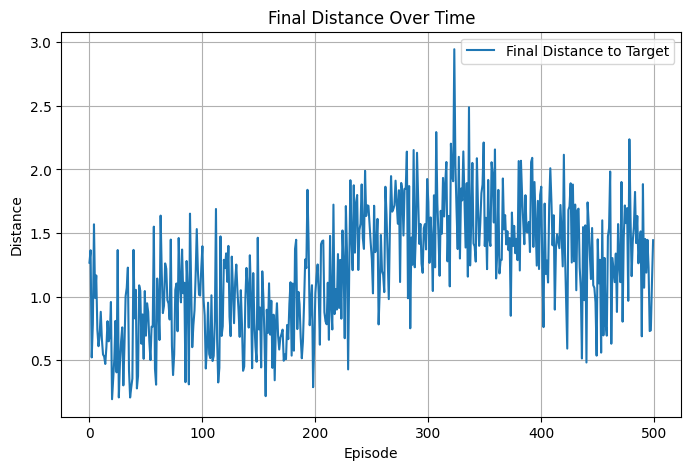

In [3]:
returns, dists, best_traj, violations, best_walls = train_policy(policy, num_episodes=500)

plt.figure(figsize=(8,5))
plt.plot(dists, label='Final Distance to Target')
plt.xlabel('Episode')
plt.ylabel('Distance')
plt.title('Final Distance Over Time')
plt.legend()
plt.grid(True)
plt.show()


Episode 0: Total Reward -261.88, Final Dist 1.23, Violations: 38
Episode 10: Total Reward -313.42, Final Dist 0.93, Violations: 49
Episode 20: Total Reward -304.48, Final Dist 1.08, Violations: 49
Episode 30: Total Reward -181.96, Final Dist 0.75, Violations: 24
Episode 40: Total Reward -352.43, Final Dist 1.82, Violations: 50
Episode 50: Total Reward -350.11, Final Dist 1.77, Violations: 48
Episode 60: Total Reward -337.20, Final Dist 1.35, Violations: 49
Episode 70: Total Reward -320.10, Final Dist 1.46, Violations: 50
Episode 80: Total Reward -311.32, Final Dist 1.12, Violations: 50
Episode 90: Total Reward -266.90, Final Dist 1.45, Violations: 38
Episode 100: Total Reward -145.66, Final Dist 0.87, Violations: 21
Episode 110: Total Reward -274.94, Final Dist 0.91, Violations: 47
Episode 120: Total Reward -226.19, Final Dist 1.11, Violations: 35
Episode 130: Total Reward -291.56, Final Dist 0.85, Violations: 42
Episode 140: Total Reward -175.14, Final Dist 1.30, Violations: 24
Episod

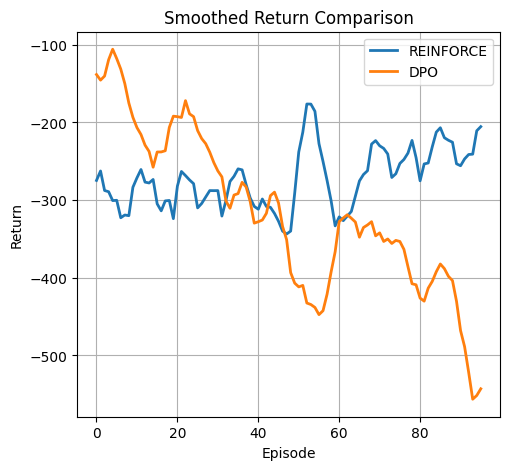

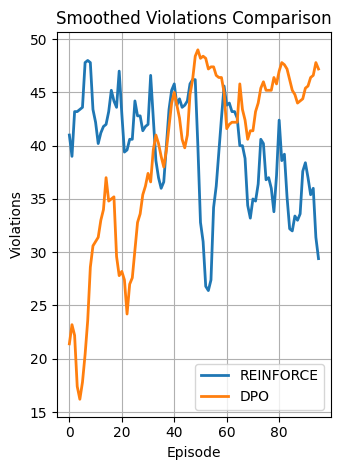

<Figure size 640x480 with 0 Axes>

In [4]:
from utils import compare_dpo_vs_reinforce

policy_reinforce = StochasticPolicyNetwork(state_dim=2, action_dim=2)
returns, _, _, violations, _ = train_policy(policy_reinforce)

compare_dpo_vs_reinforce(
    returns,
    dpo_returns,
    violations,
    dpo_violations
)


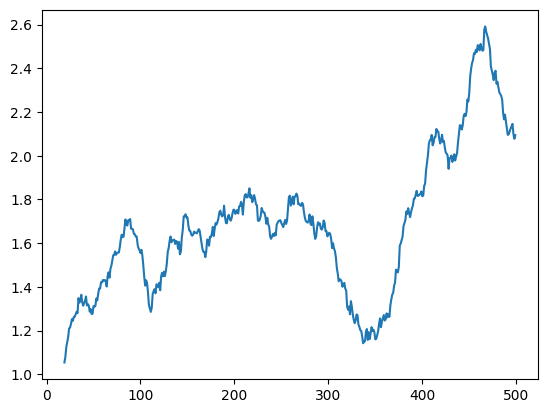

In [5]:

import numpy as np
plt.plot(pd.Series(dists).rolling(20).mean(), label='Smoothed Final Distance')


In [6]:
plt.savefig("final_distance_over_time.png", dpi=300)
print(f"Min final distance: {np.min(dists):.2f}")


Min final distance: 0.20


<Figure size 640x480 with 0 Axes>

In [7]:
best_idx = np.argmin(dists)
print(f"Best episode index: {best_idx}")


Best episode index: 14


In [8]:
from utils import plot_trajectory



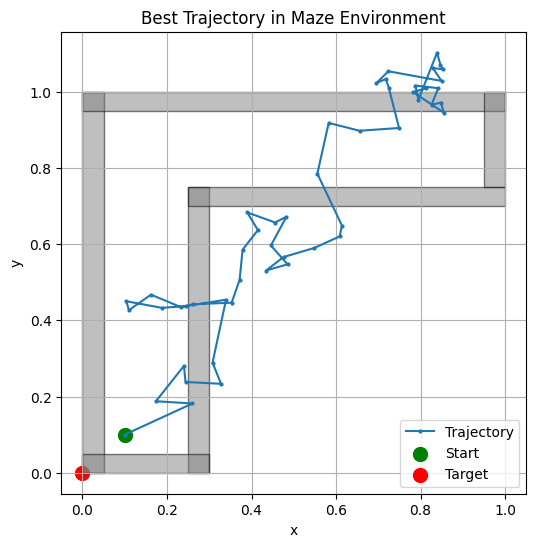

In [9]:
# Unpack the correct best trajectory and walls
states, _ = best_traj
initial_state = states[0]

plot_trajectory(
    states,
    start=initial_state,
    target=np.array([0.0, 0.0]),  # or your target
    walls=best_walls,
    title="Best Trajectory in Maze Environment"
)


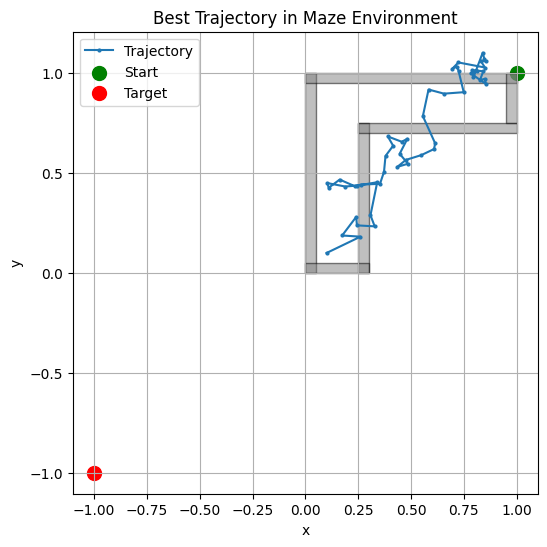

In [10]:
from utils import plot_trajectory


plot_trajectory(
    best_traj[0],
    start=np.array([1.0, 1.0]),
    target=np.array([-1.0, -1.0]),
    walls=best_walls,
    title="Best Trajectory in Maze Environment"
)



Episode 0: Total Reward -306.71, Final Dist 2.25, Violations: 37
Episode 10: Total Reward -438.29, Final Dist 2.49, Violations: 50
Episode 20: Total Reward -452.74, Final Dist 2.48, Violations: 50
Episode 30: Total Reward -385.20, Final Dist 2.19, Violations: 47
Episode 40: Total Reward -323.30, Final Dist 1.93, Violations: 40
Episode 50: Total Reward -325.72, Final Dist 1.98, Violations: 45
Episode 60: Total Reward -336.14, Final Dist 1.66, Violations: 46
Episode 70: Total Reward -209.84, Final Dist 1.41, Violations: 30
Episode 80: Total Reward -370.61, Final Dist 2.25, Violations: 45
Episode 90: Total Reward -344.20, Final Dist 1.84, Violations: 48
Episode 100: Total Reward -289.97, Final Dist 1.85, Violations: 37
Episode 110: Total Reward -358.55, Final Dist 2.07, Violations: 47
Episode 120: Total Reward -419.65, Final Dist 2.54, Violations: 47
Episode 130: Total Reward -355.36, Final Dist 2.37, Violations: 44
Episode 140: Total Reward -428.16, Final Dist 2.57, Violations: 49
Episod

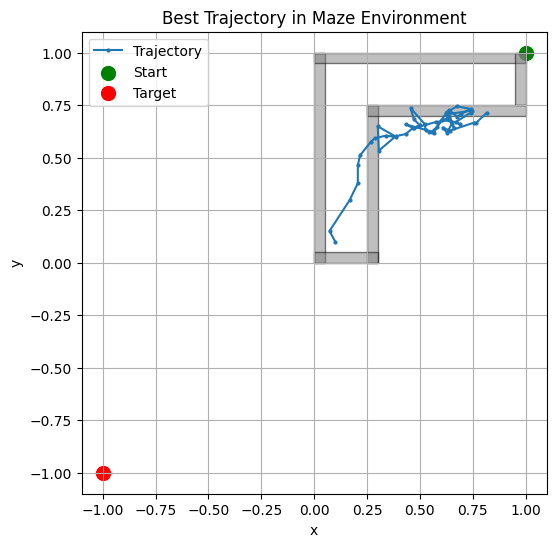

In [11]:
# Unpack all 5 return values
returns, dists, best_traj, violations, best_walls = train_policy(
    policy,
    num_episodes=500,
    constraint_penalty=-5.0,
    log_violations=True
)

# Plot best trajectory through maze
from utils import plot_trajectory
plot_trajectory(
    best_traj[0],  # states
    start=np.array([1.0, 1.0]),
    target=np.array([-1.0, -1.0]),
    walls=best_walls,
    title="Best Trajectory in Maze Environment"
)



=== Running with constraint_penalty = 0.0 ===
Episode 0: Total Reward -83.22, Final Dist 1.33, Violations: 47
Episode 10: Total Reward -72.79, Final Dist 1.17, Violations: 45
Episode 20: Total Reward -90.12, Final Dist 1.63, Violations: 50
Episode 30: Total Reward -85.56, Final Dist 1.65, Violations: 38
Episode 40: Total Reward -34.73, Final Dist 0.84, Violations: 38
Episode 50: Total Reward -73.88, Final Dist 0.98, Violations: 38
Episode 60: Total Reward -77.07, Final Dist 1.27, Violations: 46
Episode 70: Total Reward -70.68, Final Dist 1.02, Violations: 31
Episode 80: Total Reward -24.93, Final Dist 0.65, Violations: 48
Episode 90: Total Reward -25.79, Final Dist 0.51, Violations: 31
Episode 100: Total Reward -30.85, Final Dist 0.40, Violations: 41
Episode 110: Total Reward -74.47, Final Dist 0.93, Violations: 42
Episode 120: Total Reward -20.44, Final Dist 0.16, Violations: 38
Episode 130: Total Reward -25.93, Final Dist 1.20, Violations: 30
Episode 140: Total Reward -32.13, Final 

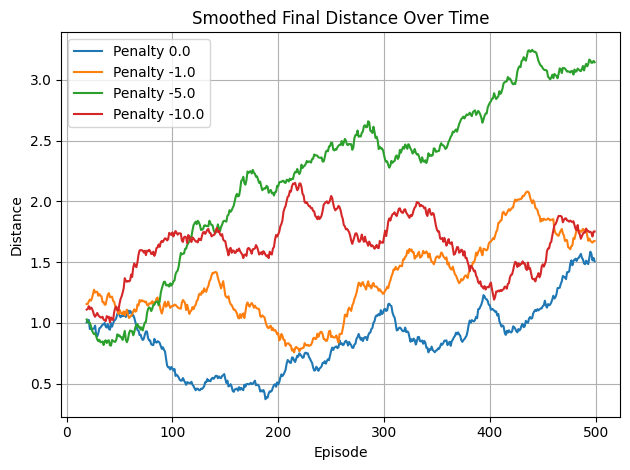

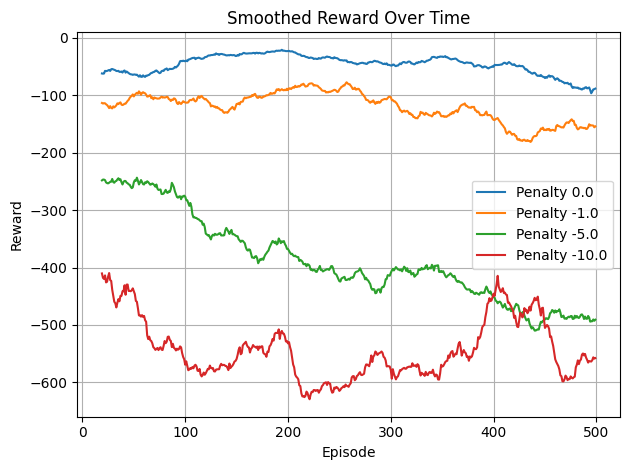

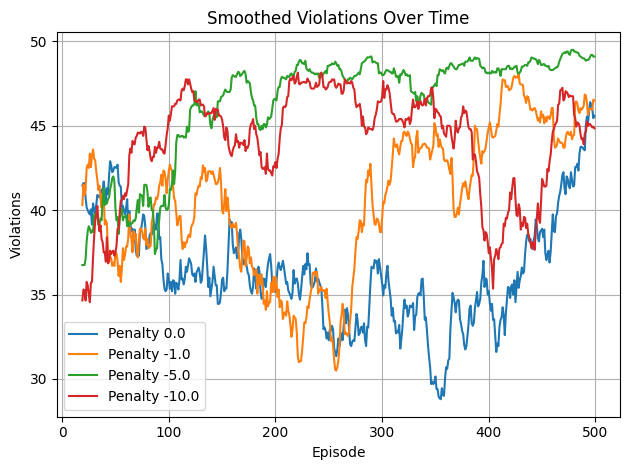

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from policy import StochasticPolicyNetwork
from train import train_policy
import os

os.makedirs("outputs", exist_ok=True)

penalty_values = [0.0, -1.0, -5.0, -10.0]
results = []
all_dists = {}
all_rewards = {}
all_violations = {}

for penalty in penalty_values:
    print(f"\n=== Running with constraint_penalty = {penalty} ===")
    policy = StochasticPolicyNetwork(state_dim=2, action_dim=2)
    returns, dists, _, violations, _ = train_policy(
        policy,
        num_episodes=500,
        constraint_penalty=penalty,
        log_violations=True
    )
    all_dists[penalty] = dists
    all_rewards[penalty] = returns
    all_violations[penalty] = violations

    avg_violations = np.mean(violations)
    total_violations = int(np.sum(violations))
    
    results.append({
        'penalty': penalty,
        'min_distance': np.min(dists),
        'avg_reward': np.mean(returns),
        'avg_violations': avg_violations,
        'total_violations': total_violations
    })

# Summary Table
df = pd.DataFrame(results)
print(df)

# Save summary
df.to_csv("outputs/summary_metrics.csv", index=False)

# === PLOTS ===
for penalty in penalty_values:
    plt.plot(pd.Series(all_dists[penalty]).rolling(20).mean(), label=f'Penalty {penalty}')
plt.title("Smoothed Final Distance Over Time")
plt.xlabel("Episode")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("outputs/smoothed_final_distance.png")
plt.show()

for penalty in penalty_values:
    plt.plot(pd.Series(all_rewards[penalty]).rolling(20).mean(), label=f'Penalty {penalty}')
plt.title("Smoothed Reward Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("outputs/smoothed_rewards.png")
plt.show()

for penalty in penalty_values:
    plt.plot(pd.Series(all_violations[penalty]).rolling(20).mean(), label=f'Penalty {penalty}')
plt.title("Smoothed Violations Over Time")
plt.xlabel("Episode")
plt.ylabel("Violations")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("outputs/smoothed_violations.png")

plt.show()


Episode 0: Total Reward -70.40, Final Dist 1.35, Violations: 46
Episode 10: Total Reward -39.17, Final Dist 0.62, Violations: 45
Episode 20: Total Reward -95.04, Final Dist 1.40, Violations: 50
Episode 30: Total Reward -63.74, Final Dist 0.95, Violations: 42
Episode 40: Total Reward -30.24, Final Dist 0.59, Violations: 40
Episode 50: Total Reward -45.48, Final Dist 0.74, Violations: 32
Episode 60: Total Reward -20.52, Final Dist 0.20, Violations: 32
Episode 70: Total Reward -27.99, Final Dist 0.34, Violations: 24
Episode 80: Total Reward -44.13, Final Dist 0.53, Violations: 38
Episode 90: Total Reward -17.69, Final Dist 0.49, Violations: 39
Episode 100: Total Reward -37.04, Final Dist 0.61, Violations: 24
Episode 110: Total Reward -31.36, Final Dist 0.72, Violations: 36
Episode 120: Total Reward -80.22, Final Dist 1.49, Violations: 41
Episode 130: Total Reward -48.79, Final Dist 0.60, Violations: 44
Episode 140: Total Reward -45.40, Final Dist 0.64, Violations: 39
Episode 150: Total Re

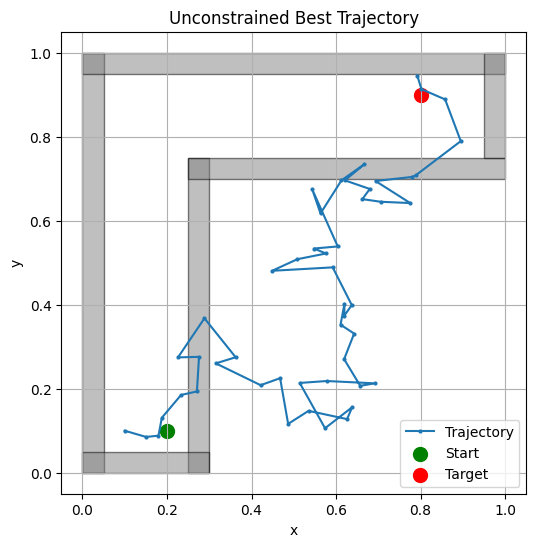

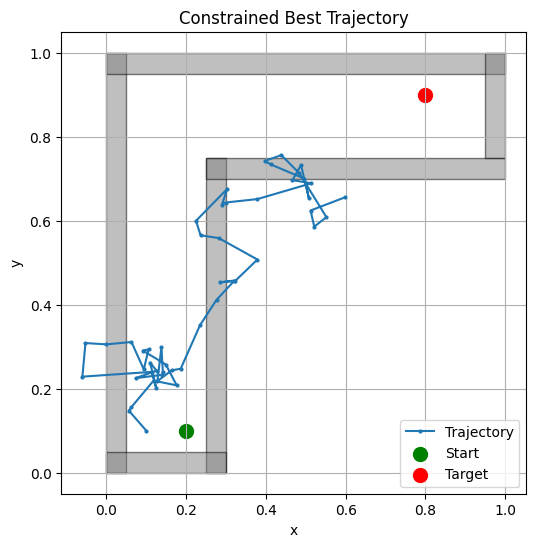

In [5]:
from utils import plot_trajectory
from policy import StochasticPolicyNetwork
from train import train_policy

import numpy as np

# Run unconstrained policy
policy_free = StochasticPolicyNetwork(state_dim=2, action_dim=2)
_, _, best_traj_free, _, best_walls = train_policy(
    policy_free,
    num_episodes=500,
    constraint_penalty=0.0,
    log_violations=True
)

# Run constrained policy
policy_constrained = StochasticPolicyNetwork(state_dim=2, action_dim=2)
_, _, best_traj_constr, _, _ = train_policy(
    policy_constrained,
    num_episodes=500,
    constraint_penalty=-50.0,
    log_violations=True
)

# Save both plots
plot_trajectory(
    best_traj_free[0],
    start=np.array([0.2, 0.1]),
    target=np.array([0.8, 0.9]),
    walls=best_walls,
    title="Unconstrained Best Trajectory",
    save_path="outputs/unconstrained_trajectory.png"
)

plot_trajectory(
    best_traj_constr[0],
    start=np.array([0.2, 0.1]),
    target=np.array([0.8, 0.9]),
    walls=best_walls,
    title="Constrained Best Trajectory",
    save_path="outputs/constrained_trajectory.png"
)


In [14]:
import pandas as pd

df = pd.DataFrame(results)
print(df)


   penalty  min_distance  avg_reward  avg_violations  total_violations
0      0.0      0.037247  -47.505901          36.658             18329
1     -1.0      0.040723 -120.420040          40.622             20311
2     -5.0      0.214419 -387.093311          46.212             23106
3    -10.0      0.356735 -540.502516          43.830             21915


Episode 0: Total Reward -68.29, Final Dist 1.51, Violations: 49
Episode 10: Total Reward -97.64, Final Dist 1.49, Violations: 48
Episode 20: Total Reward -61.56, Final Dist 0.78, Violations: 35
Episode 30: Total Reward -42.57, Final Dist 0.60, Violations: 31
Episode 40: Total Reward -65.31, Final Dist 1.15, Violations: 35
Episode 50: Total Reward -27.13, Final Dist 0.27, Violations: 37
Episode 60: Total Reward -65.49, Final Dist 1.29, Violations: 31
Episode 70: Total Reward -39.87, Final Dist 0.92, Violations: 47
Episode 80: Total Reward -30.38, Final Dist 0.57, Violations: 27
Episode 90: Total Reward -26.83, Final Dist 0.67, Violations: 34
Episode 100: Total Reward -67.08, Final Dist 1.27, Violations: 44
Episode 110: Total Reward -31.73, Final Dist 0.83, Violations: 35
Episode 120: Total Reward -51.06, Final Dist 1.10, Violations: 24
Episode 130: Total Reward -99.11, Final Dist 1.11, Violations: 49
Episode 140: Total Reward -71.48, Final Dist 1.54, Violations: 42
Episode 150: Total Re

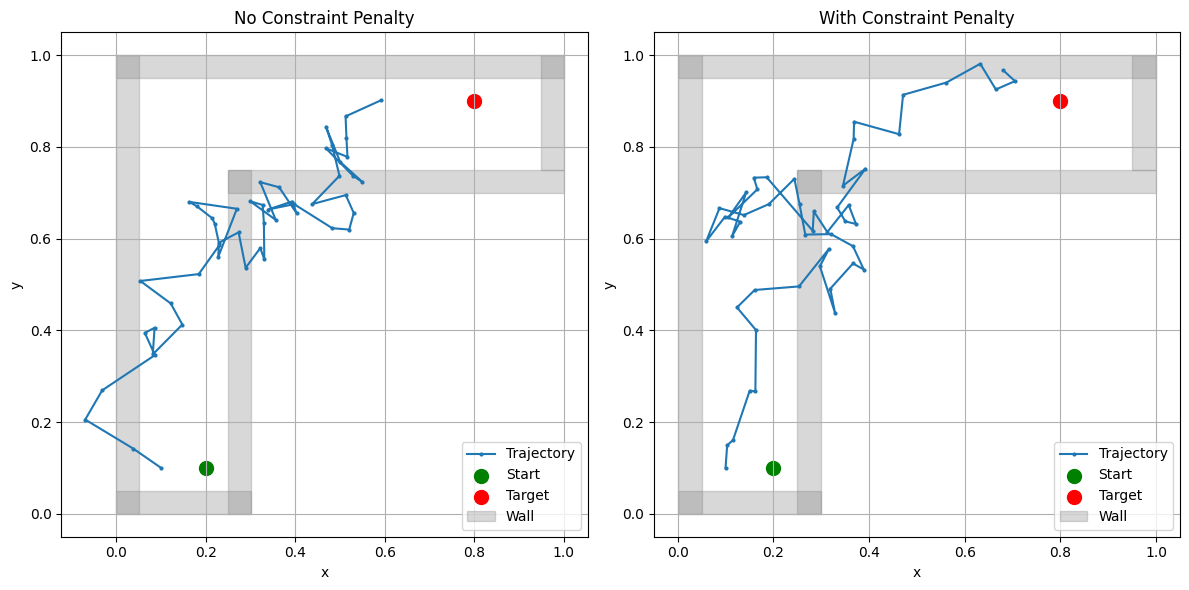

In [15]:
from matplotlib.patches import Rectangle

policy_free = StochasticPolicyNetwork(state_dim=2, action_dim=2)
returns_free, dists_free, best_traj_free, _, best_obs = train_policy(
    policy_free,
    num_episodes=500,
    constraint_penalty=0.0,
    log_violations=True
)

policy_constrained = StochasticPolicyNetwork(state_dim=2, action_dim=2)
returns_constr, dists_constr, best_traj_constr, _, best_obs = train_policy(
    policy_constrained,
    num_episodes=500,
    constraint_penalty=-5.0,
    log_violations=True
)

# 2. Extract trajectories
states_free, _ = best_traj_free
states_constr, _ = best_traj_constr
start_free = states_free[0]
start_constr = states_constr[0]
target = np.array([0.8, 0.9])
obstacle_center = np.array([0.5, 0.5])
obstacle_radius = 0.2

# 3. Plot side-by-side
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax, traj, start, title in zip(
    axs,
    [states_free, states_constr],
    [start_free, start_constr],
    ["No Constraint Penalty", "With Constraint Penalty"]
):
    start = np.array([0.2, 0.1])     # inside lower corridor
    target = np.array([0.8, 0.9])
    ax.plot(traj[:, 0], traj[:, 1], marker='o', markersize=2, label='Trajectory')
    ax.scatter(start[0], start[1], color='green', s=100, label='Start')
    ax.scatter(target[0], target[1], color='red', s=100, label='Target')
    
    for i, (x, y, w, h) in enumerate(best_walls):
        ax.add_patch(
            Rectangle((x, y), w, h, color='gray', alpha=0.3, label='Wall' if i == 0 else "")
        )


    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()